# Pairs Trading- finding pairs based on Clustering / Çift Ticareti - Kümelemeye dayalı olarak çift bulma

In this case study, we will use clustering methods to select pairs for a pairs trading
strategy.

Bu örnek olay incelemesinde, bir çift ticareti için çiftleri seçmek üzere kümeleme yöntemlerini kullanacağız.
strateji.

## Content / İçerik

* [1. Problem Definition](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1)    
    * [3.2. Data Visualisation](#2.2)
* [4. Data Preparation](#3)
    * [4.1 Data Cleaning](#3.1)
    * [4.3.Data Transformation](#3.2)  
* [5.Evaluate Algorithms and Models](#5)        
    * [5.1. k-Means Clustering](#5.1)
        * [5.1.1 Finding right number of clusters](#5.1.1)
        * [5.1.2 Clustering and Visualization](#5.1.2)
    * [5.2. Hierarchial Clustering (Agglomerative Clustering)](#5.2)
        * [5.2.1. Building Hierarchy Graph/ Dendogram](#5.2.1)
        * [5.2.2. Clustering and Visualization](#5.2.1) 
    * [5.3. Affinity Propagation Clustering](#5.3)
        * [5.3.1 Visualising the cluster](#5.2.1)
    * [5.4. Cluster Evaluation](#5.4)        
* [6.Pair Selection](#6)        
    * [6.1 Cointegration and Pair Selection Function](#6.1)    
    * [6.2. Pair Visualization](#6.2)     


#### ----------------------------------------------

* [1. Problem Tanımı](#0)
* [2. Başlarken - Kitaplıkları ve Veri Kümesini Yükleyin](#1)
    * [2.1. Kitaplıkları Yükle](#1.1)
    * [2.2. Veri Kümesini Yükle](#1.2)
* [3. Keşif Veri Analizi](#2)
    * [3.1 Tanımlayıcı İstatistikler](#2.1)
    * [3.2. Veri Görselleştirme](#2.2)
* [4. Veri Hazırlama](#3)
    * [4.1 Veri Temizleme](#3.1)
    * [4.3.Veri Dönüştürme](#3.2)
* [5. Algoritmaları ve Modelleri Değerlendirin](#5)
    * [5.1. k-Kümeleme anlamına gelir](#5.1)
        * [5.1.1 Doğru küme sayısını bulma](#5.1.1)
        * [5.1.2 Kümeleme ve Görselleştirme](#5.1.2)
    * [5.2. Hiyerarşik Kümeleme (Toplayıcı Kümeleme)](#5.2)
        * [5.2.1. Hiyerarşi Grafiği/ Dendogram Oluşturma](#5.2.1)
        * [5.2.2. Kümeleme ve Görselleştirme](#5.2.1)
    * [5.3. Yakınlık Yayılımı Kümelemesi](#5.3)
        * [5.3.1 Kümeyi görselleştirme](#5.2.1)
    * [5.4. Küme Değerlendirmesi](#5.4)
* [6.Çift Seçimi](#6)
    * [6.1 Eş Bütünleşme ve Eş Seçimi İşlevi](#6.1)
    * [6.2. Çift Görselleştirme](#6.2)

<a id='0'></a>
# 1. Problem Definition

Our goal in this case study is to perform clustering analysis on the stocks of S&P500
and come up with pairs for a pairs trading strategy.


The data of the stocks of S&P 500, obtained using pandas_datareader from yahoo
finance. It includes price data from 2018 onwards.
#### --------------------------------------------------------------------
Bu örnek olay incelemesindeki amacımız, S&P500 hisse senetleri üzerinde kümeleme analizi yapmaktır.
ve bir çift ticaret stratejisi için çiftler bulun.


Yahoo'dan pandas_datareader kullanılarak alınan S&P 500 hisselerinin verileri
finans. 2018'den itibaren fiyat verilerini içerir.

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages / Başlarken - Verileri ve python paketlerini yükleme

<a id='1.1'></a>
## 2.1. Loading the python packages / Python paketlerini yükleme

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime
import pandas_datareader as dr

from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation, DBSCAN
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold


import matplotlib.ticker as ticker
from itertools import cycle

<a id='1.2'></a>
## 2.2. Loading the Data / Verileri Yükleme

In [2]:
#The data already obtained from yahoo finance is imported.
#Yahoo Finance'ten alınan veriler içe aktarılır.
dataset = read_csv('SP500Data.csv',index_col=0)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
type(dataset)

pandas.core.frame.DataFrame

<a id='2'></a>
# 3. Exploratory Data Analysis / Keşifsel Veri Analizi

<a id='2.1'></a>
## 3.1. Descriptive Statistics / Tanımlayıcı istatistikler

In [5]:

dataset.shape

(448, 502)

In [6]:
set_option('display.width', 100)
dataset.head(5)

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AMG,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,58.790001,98.410004,192.490005,153.839996,64.309998,177.699997,10.98,106.089996,10.88,203.039993,...,146.990005,164.300003,47.810001,29.370001,67.879997,68.070000,81.599998,124.059998,50.700001,71.769997
2018-01-03,58.919998,99.949997,195.820007,154.550003,65.309998,181.039993,11.55,107.050003,10.87,202.119995,...,149.740005,162.520004,47.490002,29.330000,69.239998,68.900002,81.529999,124.919998,50.639999,72.099998
2018-01-04,58.820000,99.379997,199.250000,156.380005,64.660004,183.220001,12.12,111.000000,10.83,198.539993,...,151.259995,163.399994,47.119999,29.690001,70.489998,69.360001,82.360001,124.739998,50.849998,72.529999
2018-01-05,58.990002,101.110001,202.320007,157.669998,66.370003,185.339996,11.88,112.180000,10.87,199.470001,...,152.229996,164.490005,46.790001,29.910000,74.150002,69.230003,82.839996,125.980003,50.869999,73.360001
2018-01-08,58.820000,99.489998,207.800003,158.929993,66.629997,185.039993,12.28,111.389999,10.87,200.529999,...,151.410004,162.300003,47.139999,30.260000,74.639999,69.480003,82.980003,126.220001,50.619999,74.239998


In [7]:
pd.set_option('display.precision', 3)
dataset.describe()

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AMG,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
count,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,...,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000
mean,70.934,88.078,307.304,167.474,59.631,252.271,21.805,147.501,14.535,128.424,...,165.139,139.475,51.671,29.151,90.774,74.549,93.492,120.406,49.230,94.787
std,9.016,13.481,71.990,14.635,13.119,29.001,7.425,21.095,2.266,38.573,...,17.384,29.252,6.651,3.450,21.081,4.927,11.959,9.200,4.820,14.396
min,56.270,62.980,159.310,133.670,40.110,177.700,9.530,103.760,10.060,71.800,...,134.840,92.010,42.130,18.920,62.820,61.380,76.300,97.230,38.510,71.510
25%,62.620,78.658,260.557,157.280,47.038,235.377,15.147,133.307,12.848,94.060,...,151.705,114.085,45.690,27.140,71.665,70.548,83.508,114.030,45.108,84.557
50%,70.015,88.525,301.940,162.880,55.270,254.685,21.885,154.950,14.830,113.390,...,158.810,132.975,49.370,29.075,85.195,75.165,89.930,120.645,49.185,90.090
75%,78.620,96.667,368.095,178.338,71.565,272.990,28.438,163.615,16.355,158.855,...,178.065,164.927,56.715,31.455,109.368,78.360,101.462,125.850,53.215,101.970
max,88.740,123.210,449.750,201.120,83.390,311.270,34.390,184.720,18.410,215.760,...,199.360,201.510,65.820,36.480,139.720,84.410,119.210,142.610,58.540,128.470


<a id='2.2'></a>
## 3.2. Data Visualization / Veri Görselleştirme

We will take a detailed look into the visualization post clustering.

Kümeleme sonrası görselleştirmeye ayrıntılı olarak bakacağız.

<a id='3'></a>
## 4. Data Preparation / Veri Hazırlama

<a id='3.1'></a>
## 4.1. Data Cleaning / Veri Temizleme
We check for the NAs in the rows, either drop them or fill them with the mean of the column.

Satırlardaki NA'ları kontrol ediyoruz, ya bırakıyoruz ya da sütunun ortalamasıyla dolduruyoruz.

In [8]:
print('Null Values =',dataset.isnull().values.any())

Null Values = True


Getting rid of the columns with more than 30% missing values. 

%30'dan fazla eksik değer içeren sütunlardan kurtulmak.

In [9]:
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)

missing_fractions.head(10)

drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))

dataset.drop(labels=drop_list, axis=1, inplace=True)
dataset.shape

(448, 498)

Given that there are null values drop the rown contianing the null values.

Boş değerlerin olduğu göz önüne alındığında, boş değerleri içeren sırayı bırakın.

In [10]:
# Fill the missing values with the last value available in the dataset. 
dataset=dataset.fillna(method='ffill')
dataset.head(2)

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AMG,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,58.79,98.41,192.49,153.84,64.31,177.70,10.98,106.09,10.88,203.04,...,146.99,164.30,47.81,29.37,67.88,68.07,81.60,124.06,50.70,71.77
2018-01-03,58.92,99.95,195.82,154.55,65.31,181.04,11.55,107.05,10.87,202.12,...,149.74,162.52,47.49,29.33,69.24,68.90,81.53,124.92,50.64,72.10


<a id='3.2'></a>
## 4.2. Data Transformation / Veri Dönüşümü

For the purpose of clustering, we will be using annual
returns and variance as the variables as they are the indicators of the stock performance and its volatility. Let us prepare the return and volatility variables from the
data.

Kümeleme amacıyla, yıllık kullanacağız
getiriler ve varyans, hisse senedi performansının ve oynaklığının göstergeleri oldukları için değişkenler olarak. Getiri ve oynaklık değişkenlerini hazırlayalım.
veri.

In [11]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
#Teorik bir yıllık süre boyunca ortalama yıllık getiri yüzdesini ve oynaklıkları hesaplayın
returns = dataset.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = dataset.pct_change().std() * np.sqrt(252)
data=returns
#format the data as a numpy array to feed into the K-Means algorithm
#data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

All the variables should be on the same scale before applying clustering, otherwise a feature with large values will dominate the result. We use StandardScaler in sklearn to standardize the dataset’s features onto unit scale (mean = 0 and variance = 1).

Kümeleme uygulanmadan önce tüm değişkenler aynı ölçekte olmalıdır, aksi takdirde büyük değerlere sahip bir özellik sonuca hakim olacaktır. Veri kümesinin özelliklerini birim ölçekte (ortalama = 0 ve varyans = 1) standart hale getirmek için sklearn'de StandardScaler kullanıyoruz.

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
rescaledDataset = pd.DataFrame(scaler.fit_transform(data),columns = data.columns, index = data.index)
# summarize transformed data
# dönüştürülen verileri özetle
rescaledDataset.head(2)
X=rescaledDataset
X.head(2)

,Returns,Volatility
ABT,0.794,-0.703
ABBV,-0.928,0.795


The parameters to clusters are the indices and the variables used in the clustering are the columns. Hence the data is in the right format to be fed to the clustering algorithms

Kümelerin parametreleri indekslerdir ve kümelemede kullanılan değişkenler sütunlardır. Dolayısıyla veriler, kümeleme algoritmalarına beslenmek için doğru formattadır.

<a id='4'></a>
# 5. Evaluate Algorithms and Models / Algoritmaları ve Modelleri Değerlendirin

We will look at the following models/Aşağıdaki modellere bakacağız:

1. KMeans
2. Hierarchical Clustering (Agglomerative Clustering)
3. Affinity Propagation 

<a id='5.1'></a>
## 5.1. K-Means Clustering 


<a id='5.1.1'></a>
### 5.1.1. Finding optimal number of clusters / Optimal küme sayısını bulma

In this step we look at the following metrices/Bu adımda aşağıdaki metriklere bakıyoruz:

1. Sum of square errors (SSE) within clusters
2. Silhouette score.

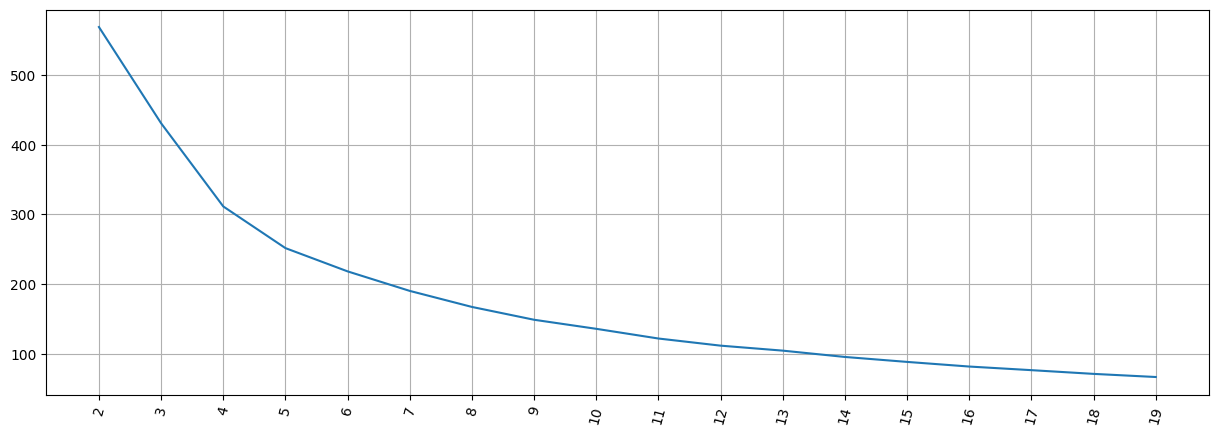

In [13]:
distorsions = []
max_loop=20
for k in range(2, max_loop):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_loop), distorsions)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.grid(True)

Inspecting the sum of squared errors chart, it appears the elbow “kink” occurs 5 or 6
clusters for this data. Certainly, we can see that as the number of clusters increase pass
6, the sum of square of errors within clusters plateaus off.

#### -------------

Hataların karesi toplamı grafiği incelendiğinde, dirseğin "bükülmesi"nin 5 veya 6 meydana geldiği görülmektedir.
Bu veriler için kümeler. Elbette küme sayısı arttıkça geçişin arttığını görebiliriz.
6, kümeler içindeki hataların karelerinin toplamı kapalı platolardır.

#### Silhouette score

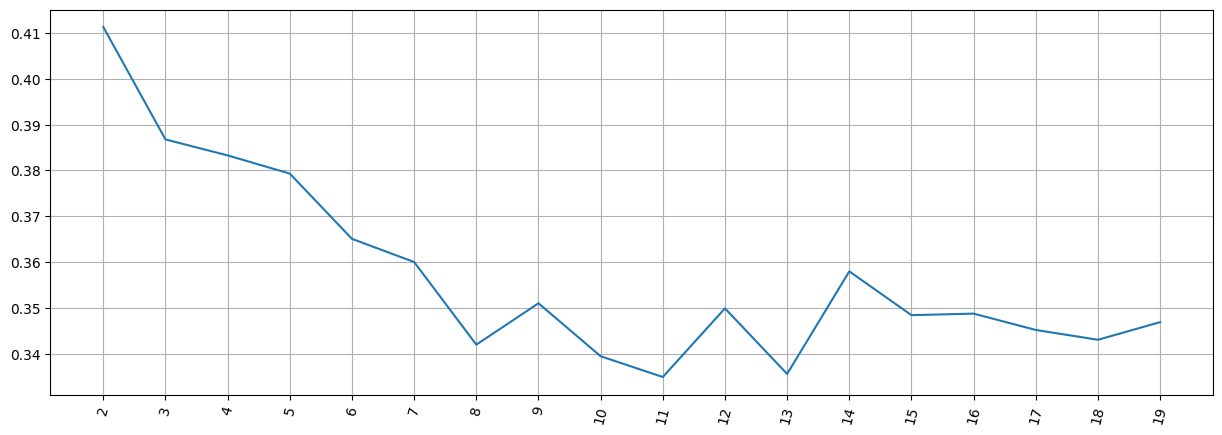

In [14]:
from sklearn import metrics

silhouette_score = []
for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k, random_state=10, n_init=10)
        kmeans.fit(X)        
        silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state=10))
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_loop), silhouette_score)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.grid(True)

From the silhouette score chart, we can see that there are various parts of the graph
where a kink can be seen. Since there is not much a difference in SSE after 6 clusters,
we would prefer 6 clusters in the K-means model.

### --------------------------------------

Siluet puan çizelgesinden, grafiğin çeşitli bölümlerinin olduğunu görebiliriz.
bir bükülmenin görülebileceği yer. 6 kümeden sonra SSE'de pek bir fark olmadığı için,
K-means modelinde 6 kümeyi tercih ederdik.

<a id='5.1.2'></a>
### 5.1.2.  Clustering and Visualisation / Kümeleme ve Görselleştirme

Let us build the k-means model with six clusters and
visualize the results.

Altı küme ile k-means modelini oluşturalım ve
sonuçları görselleştirin.

In [15]:
nclust=6

In [16]:
k_means = cluster.KMeans(n_clusters=nclust)
k_means.fit(X)

KMeans(n_clusters=6)

In [17]:
target_labels = k_means.predict(X)

Visualizing how your clusters are formed is no easy task when the number of variables/dimensions in your dataset is very large. One of the methods of visualising a cluster in two-dimensional space.

Veri kümenizdeki değişkenlerin/boyutların sayısı çok fazla olduğunda, kümelerinizin nasıl oluştuğunu görselleştirmek kolay bir iş değildir. Bir kümeyi iki boyutlu uzayda görselleştirme yöntemlerinden biri.

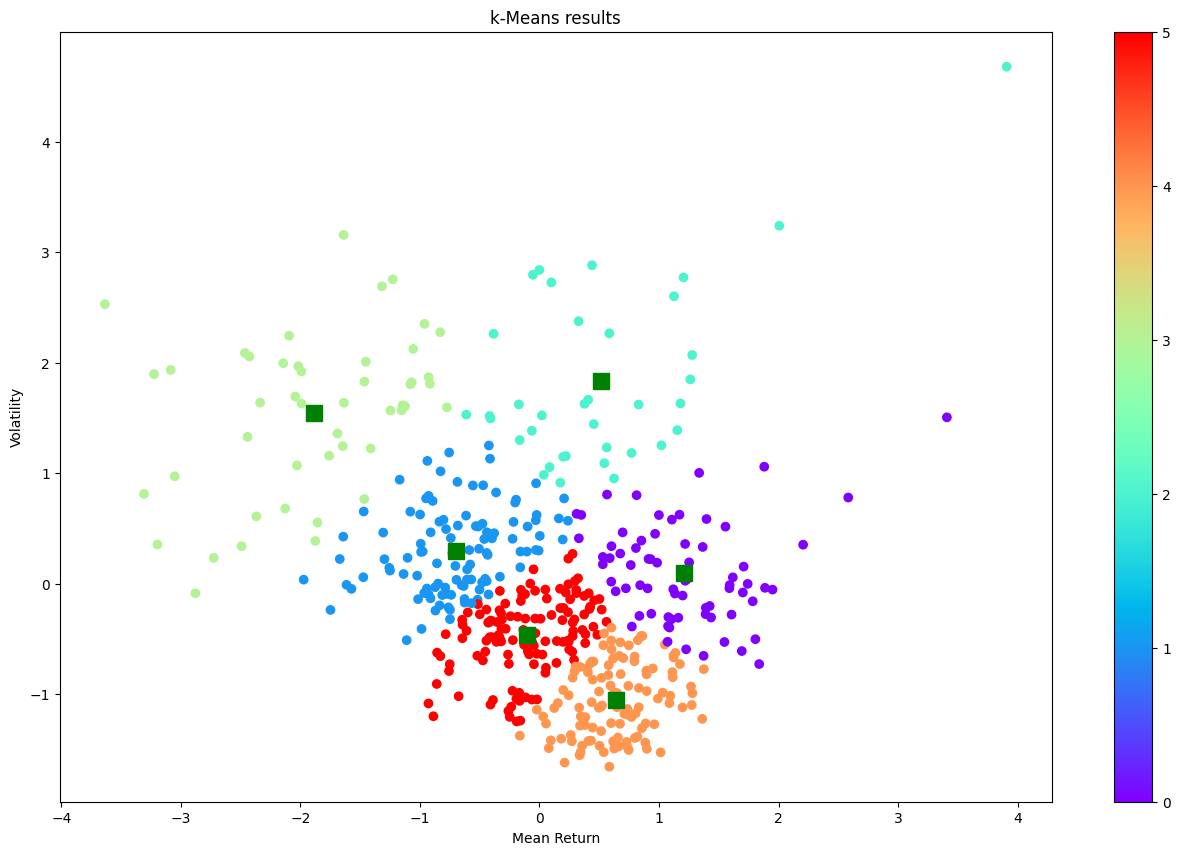

In [18]:
centroids = k_means.cluster_centers_
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c = k_means.labels_, cmap ="rainbow", label = X.index)
ax.set_title('k-Means results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)

plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=11)

Let us check the elements of the clusters

Kümelerin elemanlarını kontrol edelim

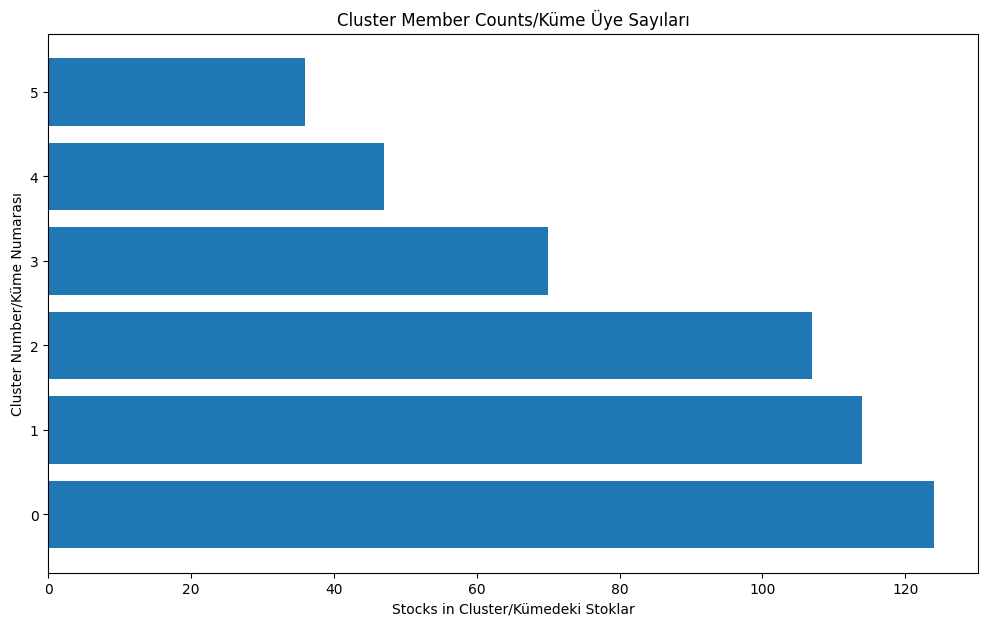

In [19]:
# show number of stocks in each cluster
# her kümedeki stok sayısını göster
clustered_series = pd.Series(index=X.index, data=k_means.labels_.flatten())
# clustered stock with its cluster label
# küme etiketi ile kümelenmiş stok
clustered_series_all = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series = clustered_series[clustered_series != -1]

plt.figure(figsize=(12,7))
plt.barh(
    range(len(clustered_series.value_counts())), 
    clustered_series.value_counts()
)
plt.title('Cluster Member Counts/Küme Üye Sayıları')
plt.xlabel('Stocks in Cluster/Kümedeki Stoklar')
plt.ylabel('Cluster Number/Küme Numarası')
plt.show()

The number of stocks in a cluster range from around 40 to 120. Although, the distribution is not equal, we have significant number of stocks in each cluster.

Bir kümedeki stok sayısı 40 ile 120 arasında değişmektedir. Dağılım eşit olmamakla birlikte her kümede önemli sayıda stokumuz bulunmaktadır.

<a id='5.2'></a>
## 5.2. Hierarchical Clustering (Agglomerative Clustering) / Hiyerarşik Kümeleme (Aglomeratif Kümeleme)

In the first step we look at the hierarchy graph and check for the number of clusters

İlk adımda hiyerarşi grafiğine bakarız ve küme sayısını kontrol ederiz.

<a id='5.2.1'></a>
### 5.2.1. Building Hierarchy Graph/ Dendogram -- Hiyerarşi Grafiği/ Dendogram Oluşturma

The hierarchy class has a dendrogram method which takes the value returned by the linkage method of the same class. The linkage method takes the dataset and the method to minimize distances as parameters. We use 'ward' as the method since it minimizes then variants of distances between the clusters.

Hiyerarşi sınıfı, aynı sınıfın bağlantı yöntemi tarafından döndürülen değeri alan bir dendrogram yöntemine sahiptir. Bağlantı yöntemi, veri kümesini ve mesafeleri en aza indirme yöntemini parametre olarak alır. Kümeler arasındaki mesafe değişkenlerini en aza indirdiği için yöntem olarak 'koğuş'u kullanıyoruz.

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage, ward

Z= linkage(X, method='ward')
Z[0]

array([3.30000000e+01, 3.14000000e+02, 3.62580431e-03, 2.00000000e+00])

The best way to visualize an agglomerate clustering algorithm is through a dendogram, which displays a cluster tree, the leaves being the individual stocks and the root being the final single cluster. The "distance" between each cluster is shown on the y-axis, and thus the longer the branches are, the less correlated two clusters are.

Bir yığın kümeleme algoritmasını görselleştirmenin en iyi yolu, bir küme ağacını görüntüleyen bir dendogramdır; yapraklar tek tek stoklardır ve kök son tek kümedir. Her küme arasındaki "mesafe" y ekseninde gösterilir ve bu nedenle dallar ne kadar uzunsa, iki küme o kadar az ilişkilidir.

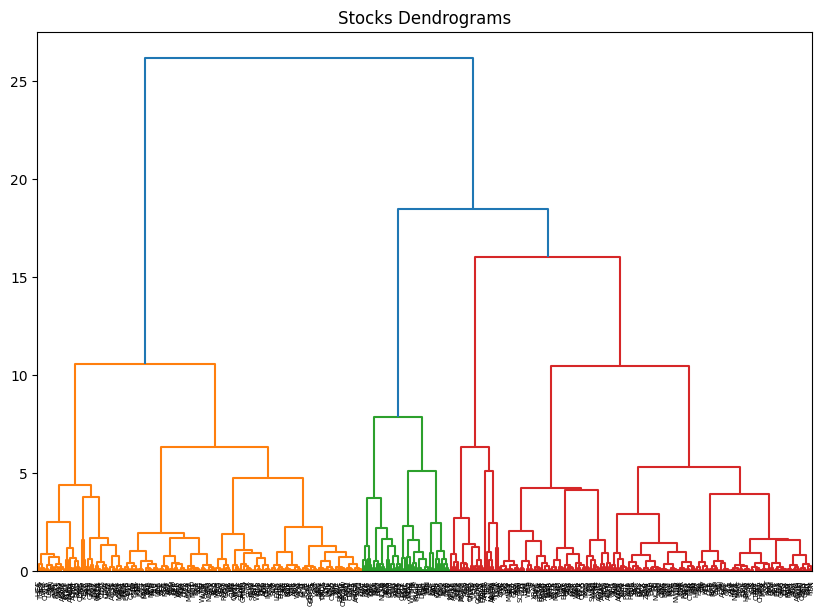

In [21]:
#Plot Dendogram
plt.figure(figsize=(10, 7))
plt.title("Stocks Dendrograms")
dendrogram(Z,labels = X.index)
plt.show()

Once one big cluster is formed, the longest vertical distance without any horizontal line passing through it is selected and a horizontal line is drawn through it. The number of vertical lines this newly created horizontal line passes is equal to number of clusters.
Then we select the distance threshold to cut the dendrogram to obtain the selected clustering level. The output is the cluster labelled for each row of data. As expected from the dendrogram, a cut at 13 gives us four clusters.

#### -------------------------------

Büyük bir küme oluşturulduktan sonra, içinden yatay çizgi geçmeyen en uzun dikey mesafe seçilir ve içinden yatay bir çizgi çizilir. Bu yeni oluşturulan yatay çizginin geçtiği düşey çizgi sayısı küme sayısı kadardır.
Ardından, seçilen kümeleme seviyesini elde etmek için dendrogramı kesmek için mesafe eşiğini seçiyoruz. Çıktı, her veri satırı için etiketlenmiş kümedir. Dendrogramdan beklendiği gibi, 13'te bir kesim bize dört küme verir.

In [22]:
distance_threshold = 13
clusters = fcluster(Z, distance_threshold, criterion='distance')
chosen_clusters = pd.DataFrame(data=clusters, columns=['cluster'])
chosen_clusters['cluster'].unique()

array([1, 4, 3, 2])

<a id='5.2.2'></a>
### 5.2.2.  Clustering and Visualisation / Kümeleme ve Görselleştirme

In [23]:
nclust = 4
hc = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
clust_labels1 = hc.fit_predict(X)

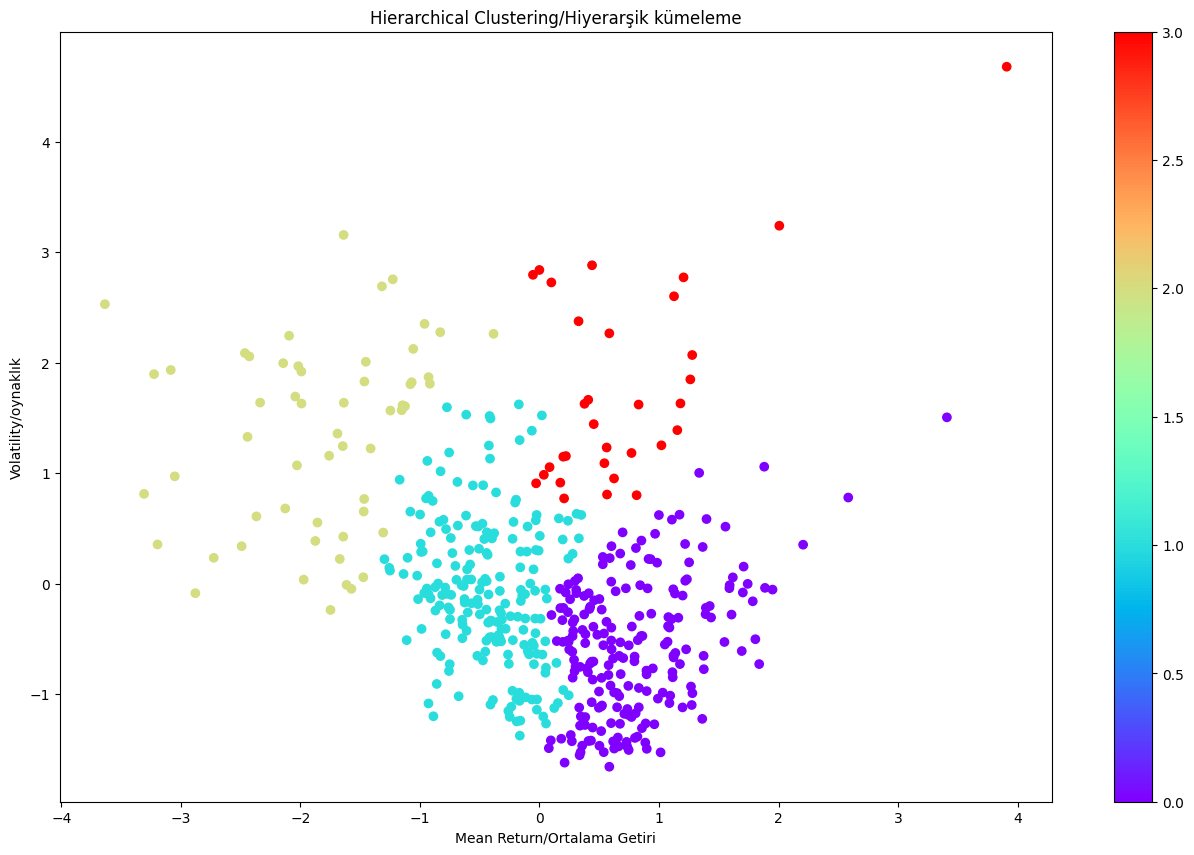

In [24]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c =clust_labels1, cmap ="rainbow")
ax.set_title('Hierarchical Clustering/Hiyerarşik kümeleme')
ax.set_xlabel('Mean Return/Ortalama Getiri')
ax.set_ylabel('Volatility/oynaklık')
plt.colorbar(scatter)

Similar to the plot of k-means clustering, we see that there are some distinct clusters
separated by different colors. 

K-ortalama kümeleme grafiğine benzer şekilde, bazı farklı kümeler olduğunu görüyoruz.
farklı renklerle ayrılmıştır.

<a id='5.3'></a>
## 5.3. Affinity Propagation /Afinite Yayılımı

In [25]:
ap = AffinityPropagation()
ap.fit(X)
clust_labels2 = ap.predict(X)

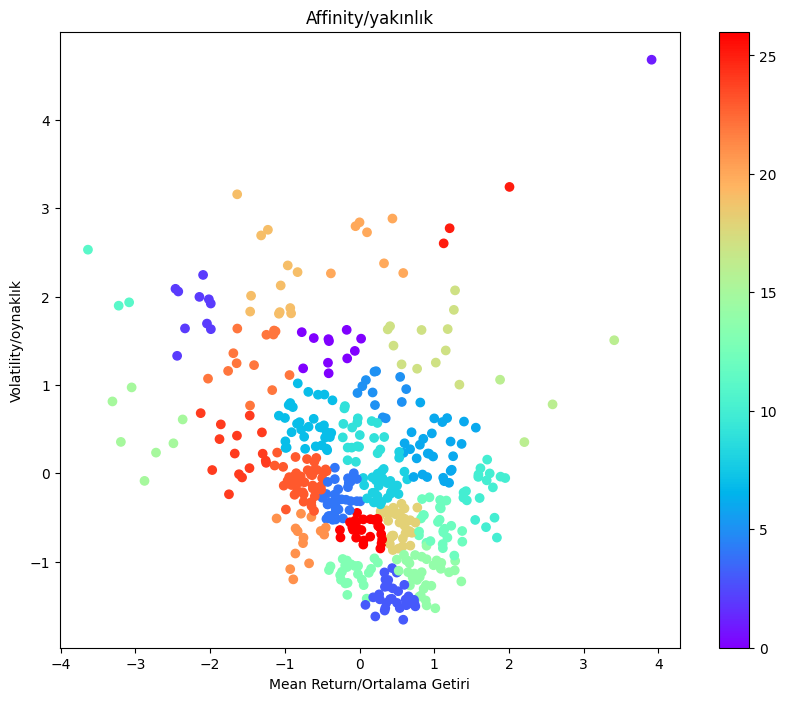

In [26]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c =clust_labels2, cmap ="rainbow")
ax.set_title('Affinity/yakınlık')
ax.set_xlabel('Mean Return/Ortalama Getiri')
ax.set_ylabel('Volatility/oynaklık')
plt.colorbar(scatter)

Similar to the plot of k-means clustering, we see that there are some distinct clusters separated by different colors.

K-means kümeleme grafiğine benzer şekilde, farklı renklerle ayrılmış bazı farklı kümeler olduğunu görüyoruz.

<a id='5.3.1'></a>
### 5.3.1 Cluster Visualisation / Küme Görselleştirme

In [27]:
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_

Estimated number of clusters: 27


<Figure size 640x480 with 0 Axes>

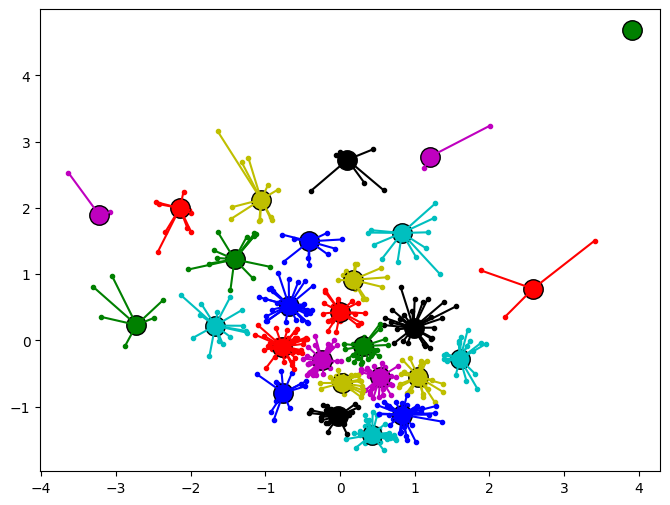

In [28]:
no_clusters = len(cluster_centers_indices)
print('Estimated number of clusters: %d' % no_clusters)
# Plot exemplars

X_temp=np.asarray(X)
plt.close('all')
plt.figure(1)
plt.clf()

fig = plt.figure(figsize=(8,6))
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(no_clusters), colors):
    class_members = labels == k
    cluster_center = X_temp[cluster_centers_indices[k]]
    plt.plot(X_temp[class_members, 0], X_temp[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
    for x in X_temp[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.show()

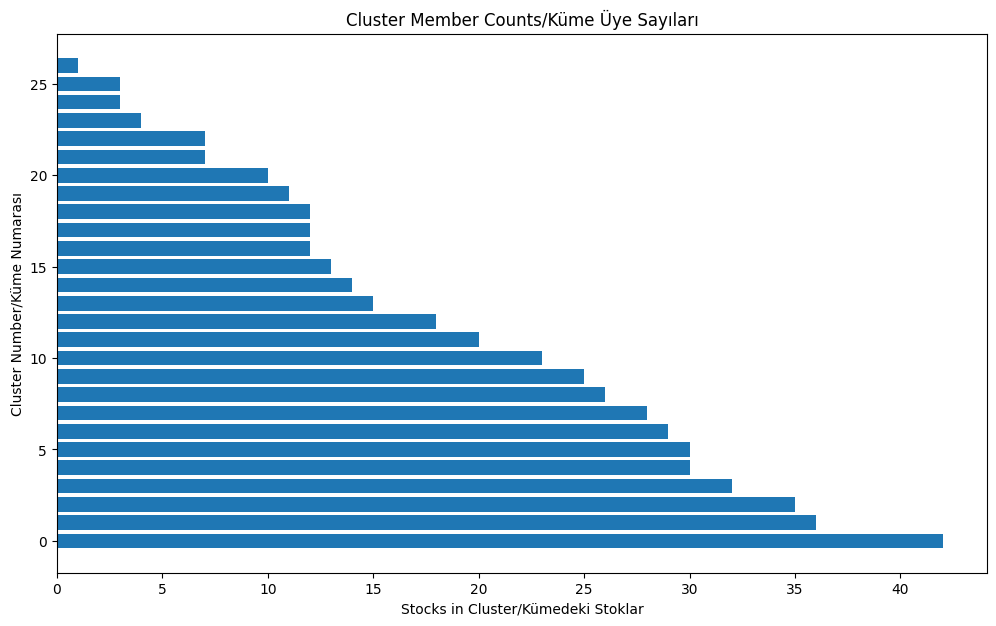

In [29]:
# show number of stocks in each cluster
# her kümedeki stok sayısını göster
clustered_series_ap = pd.Series(index=X.index, data=ap.labels_.flatten())
# clustered stock with its cluster label
# küme etiketi ile kümelenmiş stok
clustered_series_all_ap = pd.Series(index=X.index, data=ap.labels_.flatten())
clustered_series_ap = clustered_series_ap[clustered_series_ap != -1]

plt.figure(figsize=(12,7))
plt.barh(
    range(len(clustered_series_ap.value_counts())), 
    clustered_series_ap.value_counts()
)
plt.title('Cluster Member Counts/Küme Üye Sayıları')
plt.xlabel('Stocks in Cluster/Kümedeki Stoklar')
plt.ylabel('Cluster Number/Küme Numarası')
plt.show()


<a id='5.4'></a>
## 5.4. Cluster Evaluation / Küme Değerlendirmesi

If the ground truth labels are not known, evaluation must be performed using the model itself. The Silhouette Coefficient (sklearn.metrics.silhouette_score) is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

### ---------------------------------------

Yer gerçeği etiketleri bilinmiyorsa, modelin kendisi kullanılarak değerlendirme yapılmalıdır. Siluet Katsayısı (sklearn.metrics.silhouette_score), daha yüksek bir Siluet Katsayısı puanının daha iyi tanımlanmış kümelere sahip bir modelle ilgili olduğu böyle bir değerlendirmenin bir örneğidir. Siluet Katsayısı her örnek için tanımlanır ve iki puandan oluşur:

In [30]:
from sklearn import metrics
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=5, random_state=10)
k_means.fit(X)
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

hc = AgglomerativeClustering(n_clusters=2)
hc_labels = hc.fit_predict(X)

print("hc", metrics.silhouette_score(X, hc_labels, metric='euclidean'))

print("km", metrics.silhouette_score(X, k_means.labels_, metric='euclidean'))
print("hc", metrics.silhouette_score(X, hc.fit_predict(X), metric='euclidean'))
print("ap", metrics.silhouette_score(X, ap.labels_, metric='euclidean'))

hc 0.3174194666185109
km 0.3793005399463079
hc 0.3174194666185109
ap 0.3450647315156527


Given the affinity propagation performs the best, we go ahead with the affinity propagation and use 27 clusters as specified by this clustering method

Afinite yayılımının en iyi performansı gösterdiği göz önüne alındığında, afinite yayılımıyla devam ediyoruz ve bu kümeleme yönteminde belirtildiği gibi 27 küme kullanıyoruz.

### Visualising the return within a cluster / Geri dönüşü bir küme içinde görselleştirme

The understand the intuition behind clustering, let us visualize the results of the clusters.

Kümelemenin ardındaki sezgiyi anlamak için kümelerin sonuçlarını görselleştirmemize izin verin.

In [31]:
# all stock with its cluster label (including -1)
# küme etiketiyle tüm stok (-1 dahil)
clustered_series = pd.Series(index=X.index, data=ap.fit_predict(X).flatten())
# clustered stock with its cluster label
# küme etiketi ile kümelenmiş stok
clustered_series_all = pd.Series(index=X.index, data=ap.fit_predict(X).flatten())
clustered_series = clustered_series[clustered_series != -1]

In [32]:
# get the number of stocks in each cluster
# her kümedeki stok sayısını al
counts = clustered_series_ap.value_counts()

# let's visualize some clusters
# bazı kümeleri görselleştirelim
cluster_vis_list = list(counts[(counts<25) & (counts>1)].index)[::-1]
cluster_vis_list

[25, 11, 16, 20, 15, 2, 0, 19, 17, 5, 22, 21, 24, 10, 9, 13]

In [33]:
CLUSTER_SIZE_LIMIT = 9999
counts = clustered_series.value_counts()
ticker_count_reduced = counts[(counts>1) & (counts<=CLUSTER_SIZE_LIMIT)]
print ("Clusters formed/Kümeler oluştu: %d" % len(ticker_count_reduced))
print ("Pairs to evaluate/Değerlendirilecek çiftler: %d" % (ticker_count_reduced*(ticker_count_reduced-1)).sum())

Clusters formed/Kümeler oluştu: 26
Pairs to evaluate/Değerlendirilecek çiftler: 12166


In [34]:
# plot a handful of the smallest clusters
# bir avuç en küçük kümeyi çiz
plt.figure(figsize=(12,7))
cluster_vis_list[0:min(len(cluster_vis_list), 4)]

[25, 11, 16, 20]

<Figure size 1200x700 with 0 Axes>

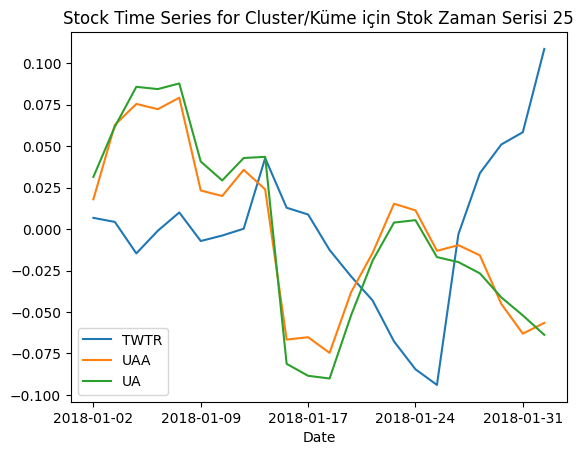

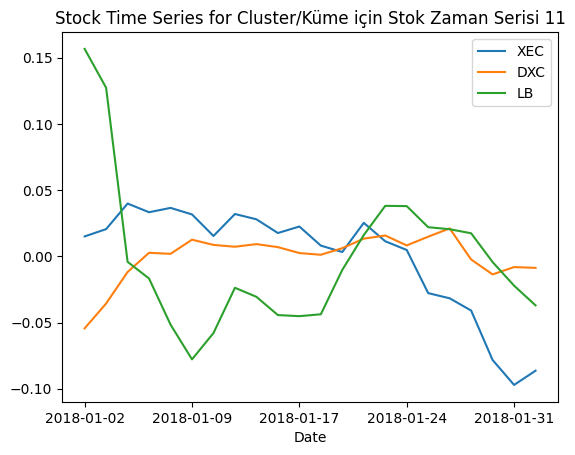

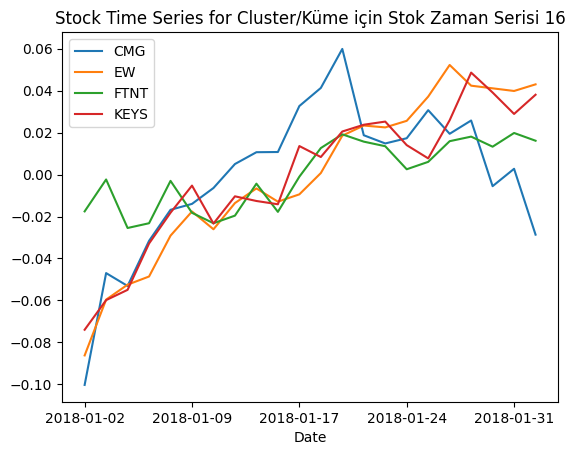

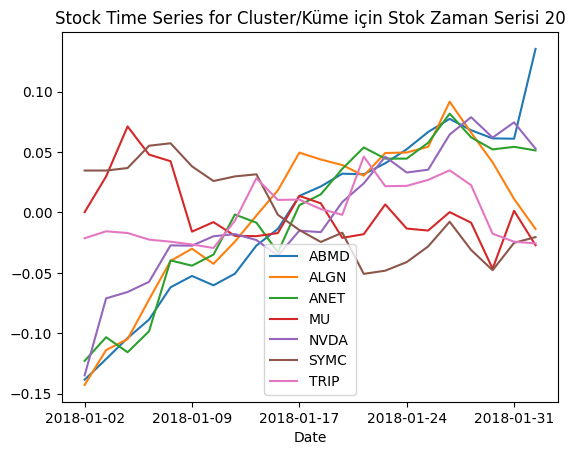

In [35]:
for clust in cluster_vis_list[0:min(len(cluster_vis_list), 4)]:
    tickers = list(clustered_series[clustered_series==clust].index)
    means = np.log(dataset.loc[:"2018-02-01", tickers].mean())
    data = np.log(dataset.loc[:"2018-02-01", tickers]).sub(means)
    data.plot(title='Stock Time Series for Cluster/Küme için Stok Zaman Serisi %d' % clust)
plt.show()

Looking at the charts above, across all the clusters with small number of stocks, we
see similar movement of the stocks under different clusters, which corroborates the
effectiveness of the clustering technique.

#### -------------------------------------------------

Yukarıdaki grafiklere bakıldığında, az sayıda hisse senedi bulunan tüm kümelerde,
hisse senetlerinin farklı kümeler altında benzer hareketine bakın, bu da
kümeleme tekniğinin etkinliği.

<a id='6'></a>
# 6. Pairs Selection / Çift Seçimi

<a id='6.1'></a>
## 6.1. Cointegration and Pair Selection Function / Eşbütünleşme ve Çift Seçim Fonksiyonu

In [36]:
def find_cointegrated_pairs(data, significance=0.05):
    # This function is from https://www.quantopian.com/lectures/introduction-to-pairs-trading
    n = data.shape[1]    
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(1):
        for j in range(i+1, n):
            S1 = data[keys[i]]            
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < significance:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [37]:
!pip install statsmodels

In [38]:
from statsmodels.tsa.stattools import coint
cluster_dict = {}
for i, which_clust in enumerate(ticker_count_reduced.index):
    tickers = clustered_series[clustered_series == which_clust].index   
    score_matrix, pvalue_matrix, pairs = find_cointegrated_pairs(
        dataset[tickers]
    )
    cluster_dict[which_clust] = {}
    cluster_dict[which_clust]['score_matrix'] = score_matrix
    cluster_dict[which_clust]['pvalue_matrix'] = pvalue_matrix
    cluster_dict[which_clust]['pairs'] = pairs

In [39]:
pairs = []
for clust in cluster_dict.keys():
    pairs.extend(cluster_dict[clust]['pairs'])

In [40]:
print ("Number of pairs found : %d" % len(pairs))
print ("In those pairs, there are %d unique tickers." % len(np.unique(pairs)))

Number of pairs found : 32
In those pairs, there are 47 unique tickers.


In [41]:
pairs

[('AOS', 'FITB'),
 ('AOS', 'ZION'),
 ('AIG', 'TEL'),
 ('ABBV', 'BWA'),
 ('ACN', 'EQIX'),
 ('AFL', 'ARE'),
 ('AFL', 'ED'),
 ('AFL', 'MMC'),
 ('AFL', 'WM'),
 ('A', 'WAT'),
 ('ADBE', 'ADI'),
 ('ADBE', 'CDNS'),
 ('ADBE', 'VFC'),
 ('ABT', 'AZO'),
 ('ABT', 'CHD'),
 ('ABT', 'IQV'),
 ('ABT', 'WELL'),
 ('ALL', 'GL'),
 ('MO', 'CCL'),
 ('ALB', 'CTL'),
 ('ALB', 'FANG'),
 ('ALB', 'EOG'),
 ('ALB', 'HP'),
 ('ALB', 'NOV'),
 ('ALB', 'PVH'),
 ('ALB', 'TPR'),
 ('ADSK', 'ULTA'),
 ('ADSK', 'XLNX'),
 ('AAL', 'FCX'),
 ('CMG', 'EW'),
 ('CMG', 'KEYS'),
 ('XEC', 'DXC')]

<a id='6.2'></a>
## 6.2. Pair Visualization / Çift Görselleştirme

In [42]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm
stocks = np.unique(pairs)
X_df = pd.DataFrame(index=X.index, data=X).T

In [43]:
in_pairs_series = clustered_series.loc[stocks]
stocks = list(np.unique(pairs))
X_pairs = X_df.T.loc[stocks]

In [44]:
X_tsne = TSNE(learning_rate=50, perplexity=3, random_state=1337).fit_transform(X_pairs)

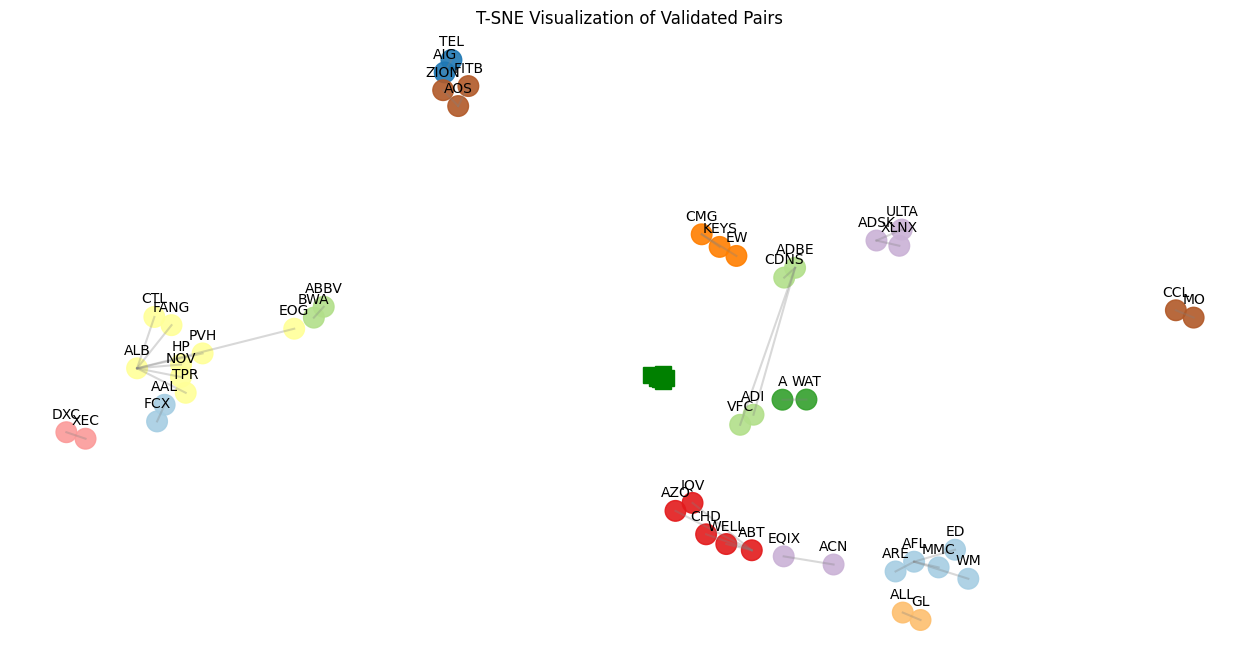

In [45]:
plt.figure(1, facecolor='white', figsize=(16,8))
plt.clf()
plt.axis('off')
for pair in pairs:
    ticker1 = pair[0]
    loc1 = X_pairs.index.get_loc(pair[0])
    x1, y1 = X_tsne[loc1, :]

    ticker2 = pair[0]
    loc2 = X_pairs.index.get_loc(pair[1])
    x2, y2 = X_tsne[loc2, :]

    plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3, c='gray')

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=220, alpha=0.9, c=in_pairs_series.values, cmap=cm.Paired)
plt.title('T-SNE Visualization of Validated Pairs')

# zip joins x and y coordinates in pairs
for x,y,name in zip(X_tsne[:,0],X_tsne[:,1],X_pairs.index):
    label = name
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')

if 'centroids' in locals():
    plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=11)


**Conclusion**

The clustering techniques do not directly help in stock trend prediction. However,
they can be effectively used in portfolio construction for finding the right pairs,
which eventually help in risk mitigation and one can achieve superior risk adjusted
returns.

We showed the approaches to finding the appropriate number of clusters in k-means
and built a hierarchy graph in hierarchical clustering. A next step from this case study
would be to explore and backtest various long/short trading strategies with pairs of
stocks from the groupings of stocks.

Clustering can effectively be used for dividing stocks into groups with “similar characteristics” for many other kinds of trading strategies and can help in portfolio construction to ensure we choose a universe of stocks with sufficient diversification
between them.


###### -------------------------------------------------------------

**Çözüm**

Kümeleme teknikleri, hisse senedi trend tahmininde doğrudan yardımcı olmaz. Fakat,
doğru çiftleri bulmak için portföy yapımında etkin bir şekilde kullanılabilirler,
sonunda risk azaltmada yardımcı olur ve kişi ayarlanmış üstün risk elde edebilir
İadeler.

K-ortalamalarda uygun küme sayısını bulma yaklaşımlarını gösterdik.
ve hiyerarşik kümelemede bir hiyerarşi grafiği oluşturdu. Bu vaka çalışmasından bir sonraki adım
çiftleri ile çeşitli uzun/kısa ticaret stratejilerini keşfetmek ve geriye dönük test etmek olacaktır.
hisse senedi gruplarından hisse senetleri.

Kümeleme, hisse senetlerini "benzer özelliklere" sahip gruplara ayırmak için etkili bir şekilde kullanılabilir ve yeterli çeşitlendirmeye sahip bir hisse senedi evreni seçmemizi sağlamak için portföy oluşturmada yardımcı olabilir.
onların arasında.